In [23]:
import pandas as pd
import geopandas as gpd
import descartes

import matplotlib.pyplot as plt

In [24]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_2019-ncov-Confirmed.csv"
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_2019-ncov-Recovered.csv"
death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_2019-ncov-Deaths.csv"


In [25]:
df_confirmed = pd.read_csv(confirmed_cases_url)
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,...,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,...,830.0,830.0,830.0,860.0,889.0,889.0,910.0,910.0,934,934
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,...,337.0,337.0,337.0,342.0,342.0,352.0,366.0,366.0,366,372
2,Chongqing,Mainland China,30.05718,107.8740,5.0,6.0,9.0,27.0,27.0,57.0,...,468.0,473.0,486.0,489.0,505.0,509.0,518.0,525.0,529,532
3,Fujian,Mainland China,26.07783,117.9895,NaN,1.0,5.0,5.0,10.0,10.0,...,261.0,261.0,261.0,267.0,272.0,272.0,279.0,279.0,281,281
4,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,2.0,2.0,2.0,4.0,...,83.0,83.0,86.0,86.0,86.0,86.0,87.0,87.0,90,90


In [26]:
df_confirmed.shape

(74, 49)

In [27]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/21/20 22:00',
       '1/22/20 12:00', '1/23/20 12:00', '1/24/20 0:00', '1/24/20 12:00',
       '1/25/20 0:00', '1/25/20 12:00', '1/25/20 22:00', '1/26/20 11:00',
       '1/26/20 23:00', '1/27/20 9:00', '1/27/20 19:00', '1/27/20 20:30',
       '1/28/20 13:00', '1/28/20 18:00', '1/28/20 23:00', '1/29/20 13:30',
       '1/29/20 14:30', '1/29/20 21:00', '1/30/20 11:00', '1/31/20 14:00',
       '2/1/20 10:00', '2/2/20 21:00', '2/3/20 21:00', '2/4/20 9:40',
       '2/4/20 22:00', '2/5/20 9:00', '2/5/20 23:00', '2/6/20 9:00',
       '2/6/20 14:20', '2/7/20 20:13', '2/7/20 22:50', '2/8/20 10:24',
       '2/8/20 23:04', '2/9/20 10:30', '2/9/20 23:20', '2/10/20 10:30',
       '2/10/20 19:30', '2/11/20 10:50', '2/11/20 20:44', '2/12/20 10:20',
       '2/12/20 22:00', '2/13/20 10:00', '2/13/20 21:15', '2/14/20 11:23'],
      dtype='object')

In [28]:
df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

,Province/State,Country/Region,Lat,Long,variable,value
0,Anhui,Mainland China,31.82571,117.2264,1/21/20 22:00,NaN
1,Beijing,Mainland China,40.18238,116.4142,1/21/20 22:00,10.0
2,Chongqing,Mainland China,30.05718,107.8740,1/21/20 22:00,5.0
3,Fujian,Mainland China,26.07783,117.9895,1/21/20 22:00,NaN
4,Gansu,Mainland China,36.06110,103.8343,1/21/20 22:00,NaN
...,...,...,...,...,...,...
3325,NaN,Belgium,50.50390,4.4699,2/14/20 11:23,1.0
3326,"Madison, WI",US,43.07310,-89.4012,2/14/20 11:23,1.0
3327,Diamond Princess cruise ship,Others,35.44370,129.6380,2/14/20 11:23,218.0
3328,"San Diego County, CA",US,32.71570,-117.1611,2/14/20 11:23,2.0


In [29]:
confirm_df = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
confirm_df

,Province/State,Country/Region,Lat,Long,variable,value
0,Anhui,Mainland China,31.82571,117.2264,1/21/20 22:00,NaN
1,Beijing,Mainland China,40.18238,116.4142,1/21/20 22:00,10.0
2,Chongqing,Mainland China,30.05718,107.8740,1/21/20 22:00,5.0
3,Fujian,Mainland China,26.07783,117.9895,1/21/20 22:00,NaN
4,Gansu,Mainland China,36.06110,103.8343,1/21/20 22:00,NaN
...,...,...,...,...,...,...
3325,NaN,Belgium,50.50390,4.4699,2/14/20 11:23,1.0
3326,"Madison, WI",US,43.07310,-89.4012,2/14/20 11:23,1.0
3327,Diamond Princess cruise ship,Others,35.44370,129.6380,2/14/20 11:23,218.0
3328,"San Diego County, CA",US,32.71570,-117.1611,2/14/20 11:23,2.0


In [30]:
confirm_df.rename(columns={"variable":"Date", "value":"Confirmed"}, inplace=True)

In [31]:
confirm_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,Anhui,Mainland China,31.82571,117.2264,1/21/20 22:00,NaN
1,Beijing,Mainland China,40.18238,116.4142,1/21/20 22:00,10.0
2,Chongqing,Mainland China,30.05718,107.8740,1/21/20 22:00,5.0
3,Fujian,Mainland China,26.07783,117.9895,1/21/20 22:00,NaN
4,Gansu,Mainland China,36.06110,103.8343,1/21/20 22:00,NaN


In [32]:
confirm_df.shape

(3330, 6)

In [33]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
3325,NaN,Belgium,50.5039,4.4699,2/14/20 11:23,1.0
3326,"Madison, WI",US,43.0731,-89.4012,2/14/20 11:23,1.0
3327,Diamond Princess cruise ship,Others,35.4437,129.6380,2/14/20 11:23,218.0
3328,"San Diego County, CA",US,32.7157,-117.1611,2/14/20 11:23,2.0
3329,"San Antonio, TX",US,29.4241,-98.4936,2/14/20 11:23,1.0


In [34]:
# Function to Fetch and Reshape
def get_n_melt_data(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State','Country/Region','Lat','Long'])
    melted_df.rename(columns={'variable':'Date', 'value':case_type}, inplace=True)
    return melted_df

In [35]:
# Fetch Death or Recovered
recovered_df = get_n_melt_data(recovered_cases_url,'Recovered')
death_df = get_n_melt_data(death_cases_url,'Deaths')

In [36]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,Anhui,Mainland China,31.82571,117.2264,1/21/20 22:00,NaN
1,Beijing,Mainland China,40.18238,116.4142,1/21/20 22:00,NaN
2,Chongqing,Mainland China,30.05718,107.8740,1/21/20 22:00,NaN
3,Fujian,Mainland China,26.07783,117.9895,1/21/20 22:00,NaN
4,Gansu,Mainland China,36.06110,103.8343,1/21/20 22:00,NaN


In [37]:
new_df = confirm_df.join(recovered_df['Recovered'])
new_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered
0,Anhui,Mainland China,31.82571,117.2264,1/21/20 22:00,NaN,NaN
1,Beijing,Mainland China,40.18238,116.4142,1/21/20 22:00,10.0,NaN
2,Chongqing,Mainland China,30.05718,107.8740,1/21/20 22:00,5.0,NaN
3,Fujian,Mainland China,26.07783,117.9895,1/21/20 22:00,NaN,NaN
4,Gansu,Mainland China,36.06110,103.8343,1/21/20 22:00,NaN,NaN


In [38]:
final_df = confirm_df.join(recovered_df['Recovered']).join(death_df['Deaths'])

In [39]:
final_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,Anhui,Mainland China,31.82571,117.2264,1/21/20 22:00,NaN,NaN,NaN
1,Beijing,Mainland China,40.18238,116.4142,1/21/20 22:00,10.0,NaN,NaN
2,Chongqing,Mainland China,30.05718,107.8740,1/21/20 22:00,5.0,NaN,NaN
3,Fujian,Mainland China,26.07783,117.9895,1/21/20 22:00,NaN,NaN,NaN
4,Gansu,Mainland China,36.06110,103.8343,1/21/20 22:00,NaN,NaN,NaN


In [40]:
# Save Data
final_df.to_csv('Coronavirus_updated_dataset.csv')

In [43]:
# Convert Data to GeoDataFrame
gdf01 = gpd.GeoDataFrame(final_df,geometry=gpd.points_from_xy(final_df['Long'], final_df['Lat']))

<AxesSubplot:>

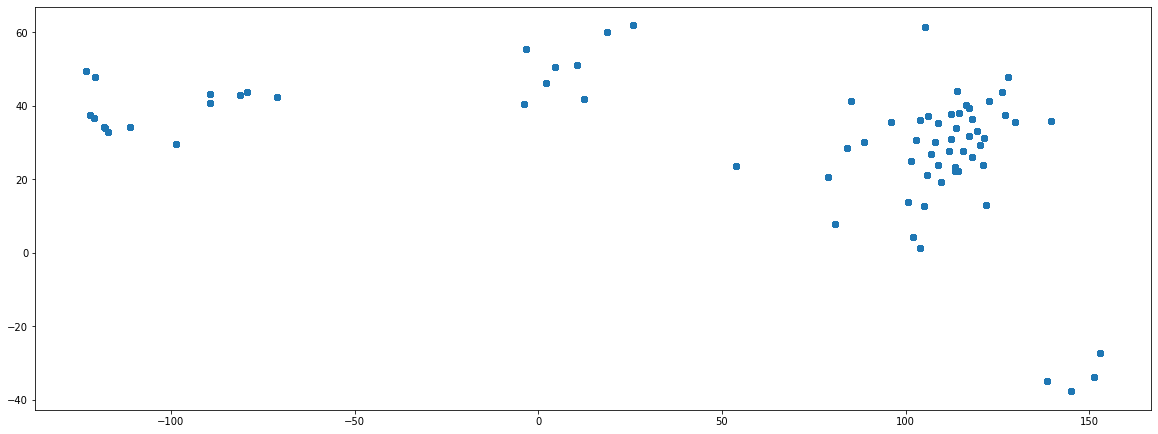

In [44]:
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.3273865)

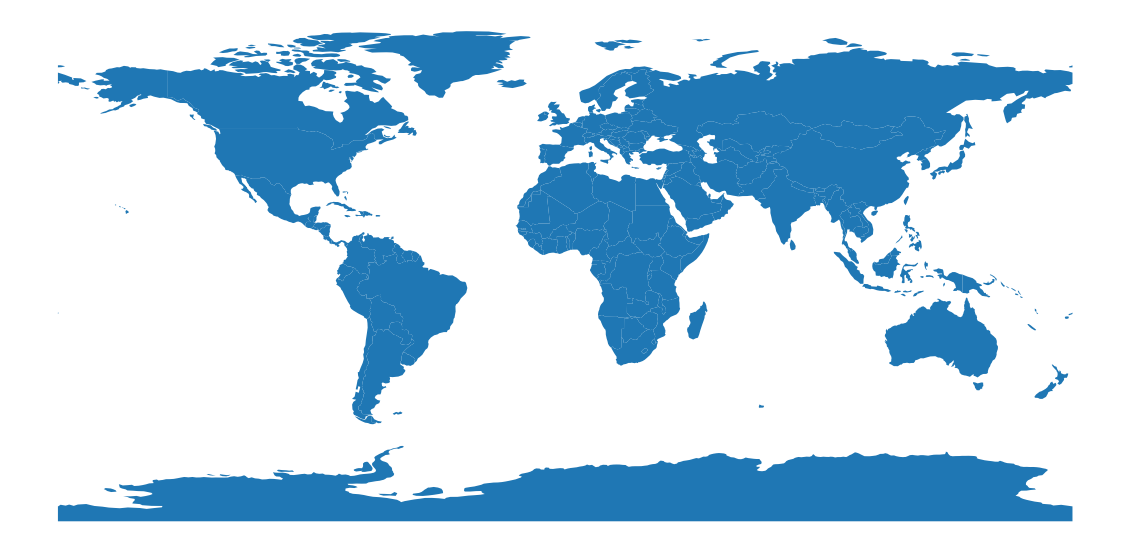

In [47]:
#overlapping with world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

<AxesSubplot:>

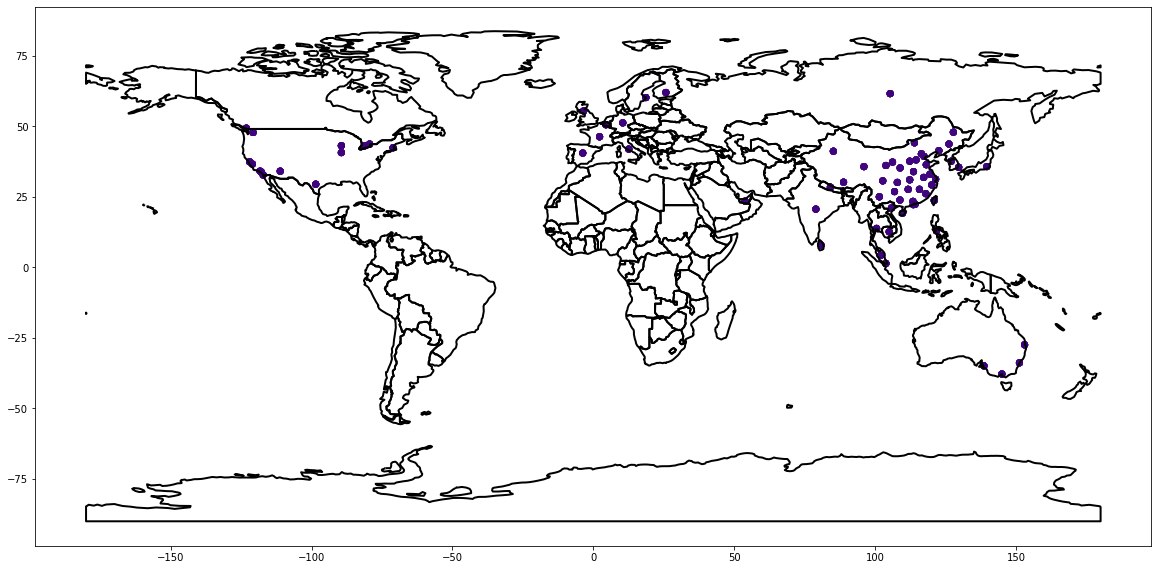

In [53]:
#Overlap with map
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None, edgecolor='k',linewidth=2, ax=ax)